<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/Soluci%C3%B3_anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

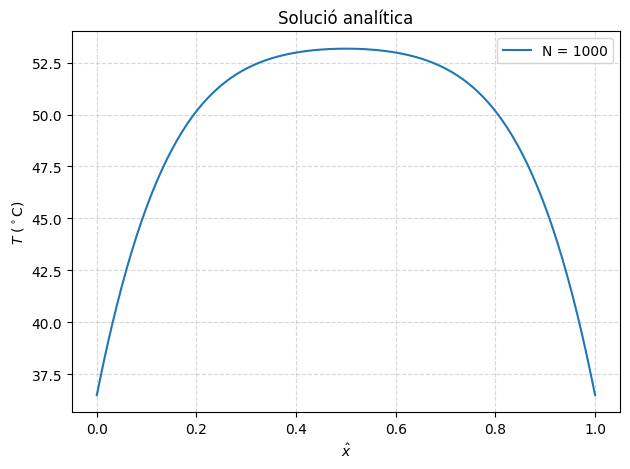

In [22]:
import numpy as np
import matplotlib.pyplot as plt


# 1. CONSTANTS FÍSIQUES
Cv    = 3686.0   # calor específic a volum constant
rho   = 1081.0   # densitat del material
kappa = 0.56     # conductivitat tèrmica
sigma = 0.472    # conductivitat elèctrica
V_rms = 40.0     # tensió eficaç aplicada


# 2. MAGNITUDS DE NORMALITZACIÓ
x_0 = 0.02                    # gruix de la paret: x̂ ∈ [0,1]
alpha = kappa / (Cv * rho)    # difusivitat tèrmica
t_0 = x_0**2 / alpha          # escala característica de temps
P_ext = (V_rms**2 * sigma) / (2 * x_0**2)
T_0 = (P_ext / (Cv * rho)) * t_0


# 3. CONDICIONS I TEMPS ADIMENSIONAL
Tc_dim  = 36.5 + 273.15   # temperatura de contorn
Tc_hat  = Tc_dim / T_0    # adimensional
t_f   = 0.025             # temps adimensional enunciat
N = 1000


# 4. SOLUCIÓ ANALÍTICA ADIMENSIONAL
def T_analytic_hat(x_hat, t_f, Tc_hat, N):
    x_arr = np.asarray(x_hat, dtype=float)
    n = np.arange(1, N + 1) # n = 1,2,...,N  → k = 1,3,5,...,2N-1
    k = 2*n - 1
    coeff = 4.0 / (k**3 * np.pi**3) * (1.0 - np.exp(-k**2 * np.pi**2 * t_f)) # coef fourier
    sin_term = np.sin(np.outer(k, np.pi * x_arr)) # part del sinus

    t_f = Tc_hat + np.sum(coeff[:, None] * sin_term, axis=0)

    # si l'entrada era escalar, retornem escalar
    if np.isscalar(x_hat):
        return float(t_f[0])
    return t_f


# 5. AVALUAR LA SOLUCIÓ I TORNAR A UNITATS FÍSIQUES
x_hat = np.linspace(0.0, 1.0, 200)
t_f = T_analytic_hat(x_hat, t_f, Tc_hat, N)
T_dim = t_f * T_0          # K
T_C = T_dim - 273.15     # °C


# 6. GRÀFICA
plt.figure()
plt.plot(x_hat, T_C, label=f"N = {N}")
plt.title('Solució analítica')
plt.xlabel(r"$\hat{x}$")
plt.ylabel(r"$T\ (\mathrm{^\circ C})$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
